## **Ecommerce Company DataSet**

As the amount that X company has to pay to the courier companies is very High, so the Goal is to verify if the charges levied by their Delivery patterns **per order** are Correct and create an model to predict the Delivery charges.

**Data Source :** https://drive.google.com/file/d/1k9R2vlKwQngF3BgndSOEszXFxTn9z7ed/view?usp=drive


* **1. Order ID:** Unique identifier for each order.
* **2. AWB Code:** Unique tracking code for each shipment.
* **3. Charged Weight:** The weight of the shipment that is used to calculate charges. It's usually either the actual weight or a volumetric weight, whichever is greater.
* **4. Warehouse Pincode:** Pincode of the warehouse from where the shipment is dispatched.
* **5. Customer Pincode:** Pincode of the customer who will receive the shipment.
* **6. Zone:** Zone classification, possibly for shipping zones or regions.
* **7. Type of Shipment:** Describes the type of shipment, possibly indicating whether it's domestic or international, or the method of shipping (e.g., air, sea, ground).
* **8. Billing Amount (Rs.):** The amount billed for the shipment, in Indian Rupees.

## **1. Data Acquisition**

In [90]:
import pandas as pd

data = pd.read_excel('Data\Raw_Data\Courier Company - Invoice.xlsx', index_col=0)
data.head(5)

,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
AWB Code,,,,,,,
1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


## **2. Summary Statistics**

In [91]:
# Shape of the Dataset
data.shape

(124, 7)

In [92]:
# Basic information of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 1091117222124 to 1091121846136
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              124 non-null    int64  
 1   Charged Weight        124 non-null    float64
 2   Warehouse Pincode     124 non-null    int64  
 3   Customer Pincode      124 non-null    int64  
 4   Zone                  124 non-null    object 
 5   Type of Shipment      124 non-null    object 
 6   Billing Amount (Rs.)  124 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 7.8+ KB


In [93]:
# Basic Statistics
data.describe()

,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Billing Amount (Rs.)
count,1.240000e+02,124.000000,124.0,124.000000,124.000000
mean,2.001811e+09,0.956048,121003.0,365488.072581,110.066129
std,5.167329e+03,0.662815,0.0,152156.322130,64.060832
min,2.001806e+09,0.150000,121003.0,140301.000000,33.000000
25%,2.001807e+09,0.667500,121003.0,302017.000000,86.700000
50%,2.001809e+09,0.725000,121003.0,321304.500000,90.200000
75%,2.001812e+09,1.100000,121003.0,405102.250000,135.000000
max,2.001827e+09,4.130000,121003.0,845438.000000,403.800000


In [94]:
# Checking missing values
data.isnull().sum()

Order ID                0
Charged Weight          0
Warehouse Pincode       0
Customer Pincode        0
Zone                    0
Type of Shipment        0
Billing Amount (Rs.)    0
dtype: int64

In [95]:
# Checking Dublicated rows
data.duplicated()

AWB Code
1091117222124    False
1091117222194    False
1091117222931    False
1091117223244    False
1091117229345    False
                 ...  
1091118551656    False
1091117614452    False
1091120922803    False
1091121844806    False
1091121846136    False
Length: 124, dtype: bool

In [96]:
# Checking unique values
unique_values_per_column = data.nunique()
print(unique_values_per_column)

Order ID                124
Charged Weight           54
Warehouse Pincode         1
Customer Pincode        108
Zone                      3
Type of Shipment          2
Billing Amount (Rs.)     20
dtype: int64


**Dataset Overview:**

The dataset comprises 124 rows and 7 columns, encompassing both features and the target variable.
Among these columns, there are no non-null values present in all columns.
There are no duplicated rows in the dataset.
There are no null values in the dataset.

**Column Information:**

**1. Order ID:**
Unique identifier for each order.
Ranges from approximately 2.001806e+09 to 2.001827e+09.

**2. Charged Weight:**
The weight charged for shipping.
Mean: 0.956048
Standard Deviation: 0.662815
Minimum: 0.150000
Maximum: 4.130000

**3. Warehouse Pincode:**
Constant value (121003) for all entries.

**4. Customer Pincode:**
Pincode of the customer.
Mean: 365488.072581
Standard Deviation: 152156.322130
Minimum: 140301
Maximum: 845438

**5. Zone:**
An identifier for the zone.
Object type.

**6. Type of Shipment:**
An identifier for the type of shipment.
Object type.

**7. Billing Amount (Rs.):**
The amount billed for the shipment, in rupees.
Mean: 110.066129
Standard Deviation: 64.060832
Minimum: 33.000000
Maximum: 403.800000

## **3. Data Visualizations**

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Text(0.5, 1.0, 'Scatter plot towards Billing Amount (Rs.)')

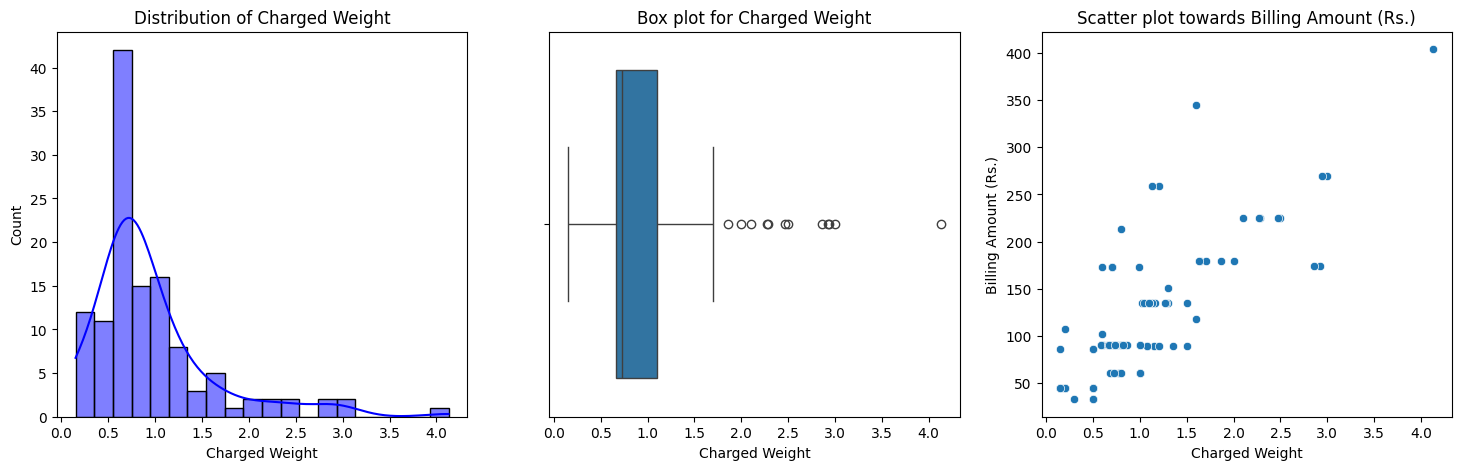

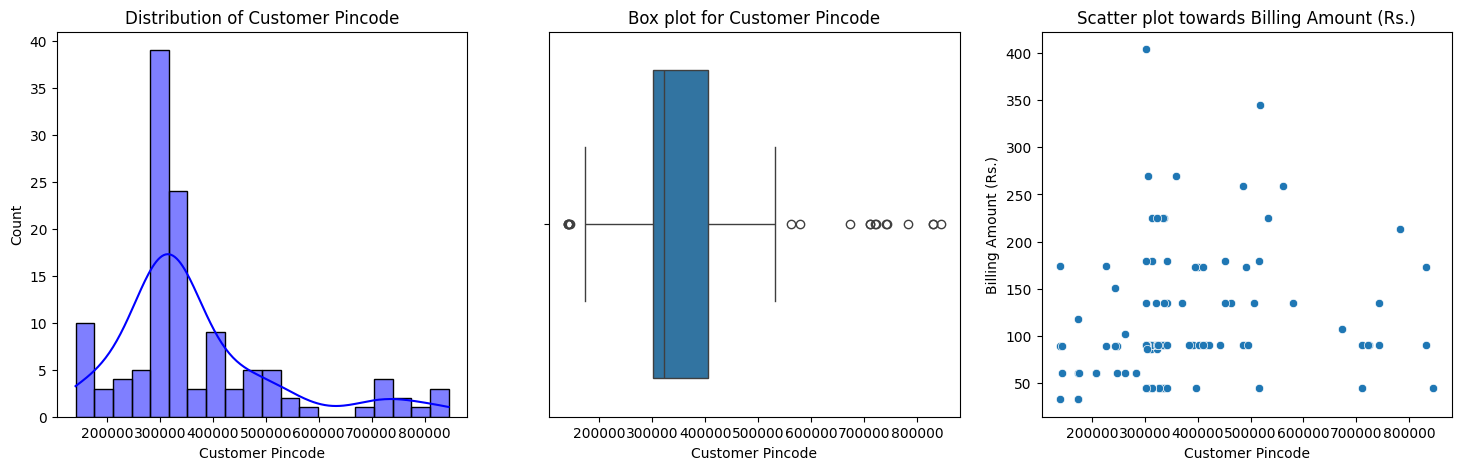

In [98]:
# creating plots for Charged Weight
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.histplot(data=data, x='Charged Weight', bins=20, kde=True, color='blue')
plt.title("Distribution of Charged Weight")

plt.subplot(1,3,2)
sns.boxplot(data=data, x='Charged Weight')
plt.title("Box plot for Charged Weight")

plt.subplot(1,3,3)
sns.scatterplot(data=data, x='Charged Weight', y='Billing Amount (Rs.)', markers=False)
plt.title('Scatter plot towards Billing Amount (Rs.)')

# creating plots for Customer Pincode
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.histplot(data=data, x='Customer Pincode',bins=20, color='blue', kde=True)
plt.title('Distribution of Customer Pincode')

plt.subplot(1,3,2)
sns.boxplot(data=data, x='Customer Pincode')
plt.title("Box plot for Customer Pincode")

plt.subplot(1,3,3)
sns.scatterplot(data=data, x='Customer Pincode', y='Billing Amount (Rs.)', markers=False)
plt.title('Scatter plot towards Billing Amount (Rs.)')

* The dataset exhibits a higher number of outliers in the Charged Weight column.
* Removal of these outliers is unfeasible due to the heightened sensitivity of the data.
* A clear correlation is evident from the scatter plot, indicating that increased product weight corresponds to higher billing amounts.
* The Charged Weight column plays a pivotal role in this dataset, emphasizing its significance in the analysis.
* The plots shows clean strong correlation between Charged Weight and Customer Pincode

Text(0.5, 1.0, 'Bar Chart over Billing Amount (Rs.) ')

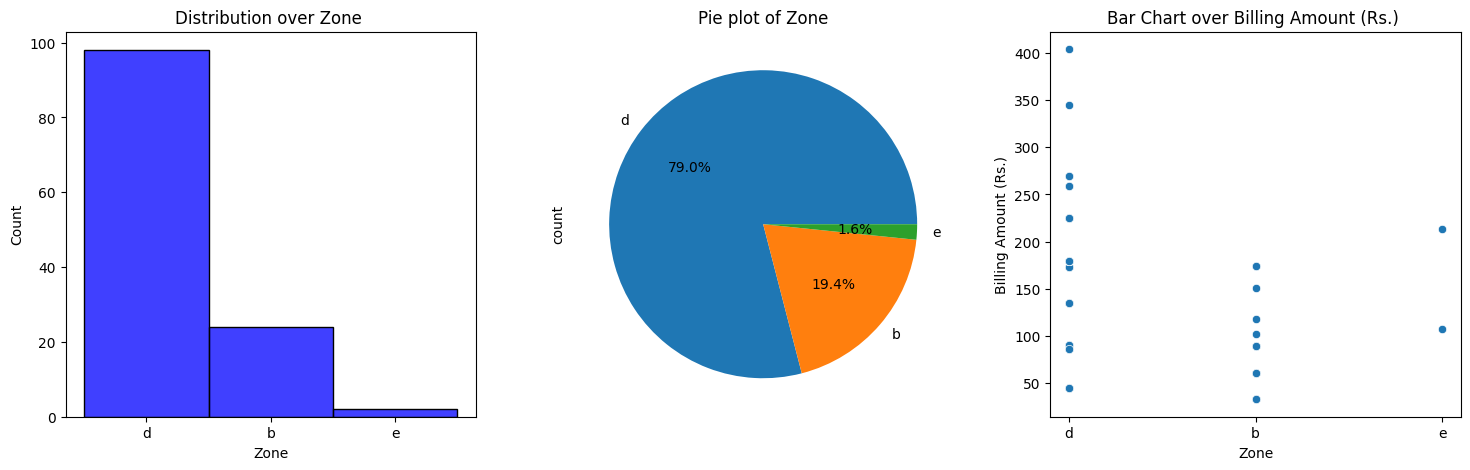

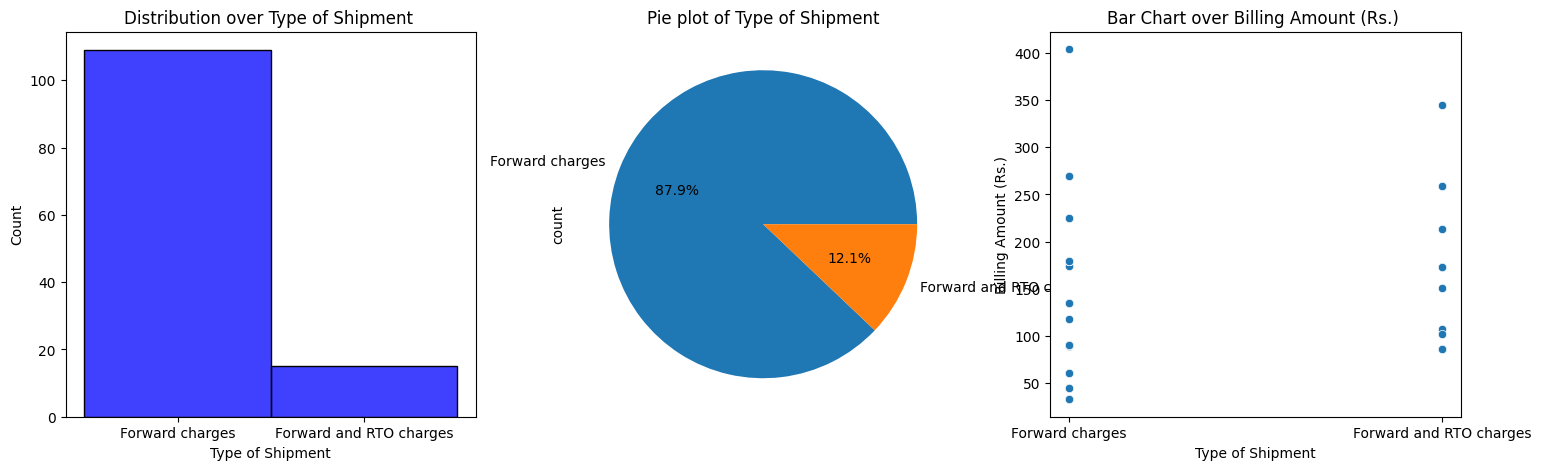

In [99]:
# creating subplot for Zone
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.histplot(data=data, x='Zone', color='blue')
plt.title('Distribution over Zone ')

plt.subplot(1,3,2)
data['Zone'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie plot of Zone')

plt.subplot(1,3,3)
sns.scatterplot(data=data, x='Zone', y='Billing Amount (Rs.)', markers=False)
plt.title('Bar Chart over Billing Amount (Rs.) ')

# creating subplot for Type of Shipment
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.histplot(data=data, x='Type of Shipment', color='blue')
plt.title('Distribution over Type of Shipment ')

plt.subplot(1,3,2)
data['Type of Shipment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie plot of Type of Shipment')

plt.subplot(1,3,3)
sns.scatterplot(data=data, x='Type of Shipment', y='Billing Amount (Rs.)', markers=False)
plt.title('Bar Chart over Billing Amount (Rs.) ')

* Zone D: Highest customer count at 79%, indicating a dominant presence.
* Zone B: Represents only 19.4% of the total customer base.
* Zone E: Accounts for a mere 1.6% of customers.
* Delivery Charges in Zone D: Varied, with both highest and lowest values observed.
* Delivery Charges in Zone B: Consistently moderate, spanning low to moderate values.
* Delivery Charges in Zone E: Range from Rs. 100 to Rs. 220, reflecting a broad spectrum of costs.
* Majority of Product Sales: Occur in local areas, particularly in zones without Return to Origin (RTO) fees.

### **correlation matrices**

In [100]:
data.head(5)

,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
AWB Code,,,,,,,
1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


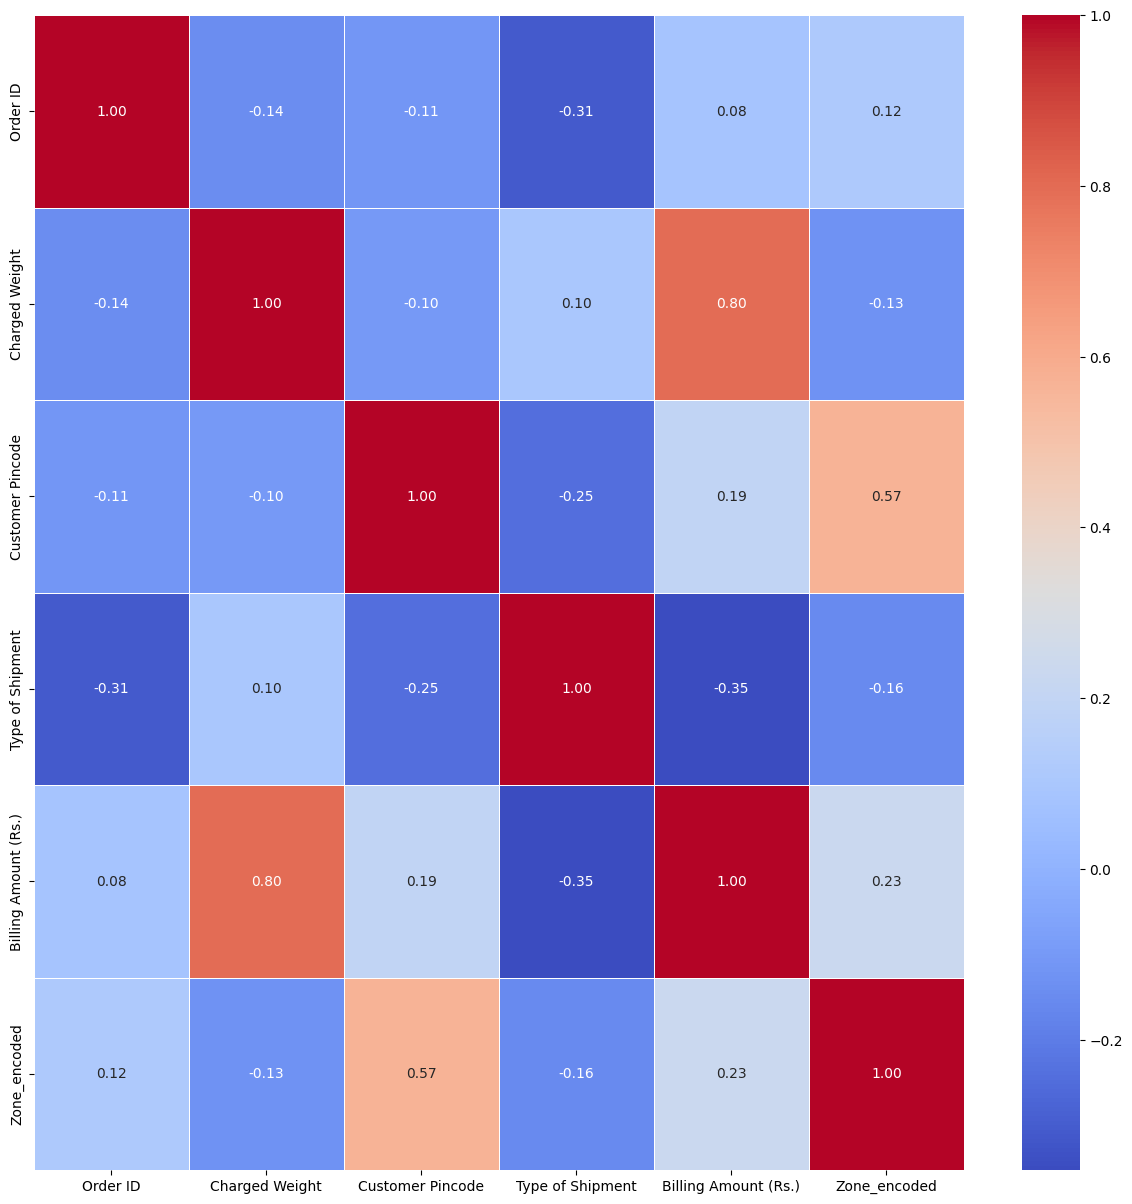

In [101]:
from sklearn.preprocessing import LabelEncoder

def corr_data(data):
    # Convert 'Type of Shipment' to binary
    data['Type of Shipment'] = data['Type of Shipment'].apply(lambda x: 1 if x == 'Forward charges' else 0)

    # Perform label encoder in Zone
    label_encoder = LabelEncoder()
    data['Zone_encoded'] = label_encoder.fit_transform(data['Zone'])
    data.drop('Zone', axis=1, inplace=True)  # Drop original 'Zone' column
    data.drop('Warehouse Pincode', axis=1, inplace=True)

    # Set the size of the heatmap
    plt.figure(figsize=(15, 15))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.show()

# Assuming 'data' is your DataFrame
corr_data(data)

## **Conclusion**

Upto this data the higest and majority customers are in Zone D, so our main goal is to focus on marketing our products to Zone B, E.